# STAT306 Project Proposal### 
Group A3 (Chris Jung, Justin Lee, Tetiksha Jain, Ayush Vora)


# Introduction

# EDA

In [24]:
# Load necessary libraries
# Install ggplot2 if it is not already installed
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
} else {
  library(ggplot2)
}
set.seed(123)

# read data and assign colour fields
redwine_data <- read.csv("winequality-red.csv", header = TRUE, sep = ";")
redwine_data$colour <- "red"
whitewine_data <- read.csv("winequality-white.csv", header = TRUE, sep = ";")
whitewine_data$colour <- "white"

# Combine the two datasets and shuffle
combined_wine_data <- rbind(redwine_data, whitewine_data)
wine_data <- combined_wine_data[sample(nrow(combined_wine_data)), ]


head(wine_data)

Loading required package: ggplot2



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,colour
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
2463,6.2,0.28,0.33,1.7,0.029,24,111,0.99000,3.24,0.50,12.1,6,white
2511,6.2,0.33,0.19,5.6,0.042,22,143,0.99425,3.15,0.63,9.9,5,white
2227,7.0,0.32,0.24,6.2,0.048,31,228,0.99570,3.23,0.62,9.4,6,white
526,10.4,0.64,0.24,2.8,0.105,29,53,0.99980,3.24,0.67,9.9,5,red
4291,6.2,0.28,0.27,10.3,0.030,26,108,0.99388,3.20,0.36,10.7,6,white
2986,5.6,0.49,0.13,4.5,0.039,17,116,0.99070,3.42,0.90,13.7,7,white


In [25]:
# Function to calculate min, max, and mean
calculate_statistics <- function(data) {
  numeric_data <- data[sapply(data, is.numeric)]
  stats <- data.frame(
    Min = round(apply(numeric_data, 2, min), 2),
    Max = round(apply(numeric_data, 2, max), 2),
    Mean = round(apply(numeric_data, 2, mean), 2)
  )
  stats$Feature <- rownames(stats)
  rownames(stats) <- NULL
  return(stats)
}

# Calculate statistics for red and white wines
red_stats <- calculate_statistics(redwine_data[ , !(names(redwine_data) %in% c("color"))])
white_stats <- calculate_statistics(whitewine_data[ , !(names(whitewine_data) %in% c("color"))])

# Add units
units <- c(
  "g(tartaric acid)/dm^3", "g(acetic acid)/dm^3", "g/dm^3", "g/dm^3",
  "g(sodium chloride)/dm^3", "mg/dm^3", "mg/dm^3", "g/dm^3", "", 
  "g(potassium sulphate)/dm^3", "% vol", ""
)

# Add units to the statistics tables
red_stats$Unit <- units
white_stats$Unit <- units

# Reorder columns for readability
red_stats <- red_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]
white_stats <- white_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]

# Print the statistics tables for red and white wines
cat("Red Wine Statistics\n")
print(red_stats)

cat("\nWhite Wine Statistics\n")
print(white_stats)

Red Wine Statistics
                Feature                       Unit  Min    Max  Mean
1         fixed.acidity      g(tartaric acid)/dm^3 4.60  15.90  8.32
2      volatile.acidity        g(acetic acid)/dm^3 0.12   1.58  0.53
3           citric.acid                     g/dm^3 0.00   1.00  0.27
4        residual.sugar                     g/dm^3 0.90  15.50  2.54
5             chlorides    g(sodium chloride)/dm^3 0.01   0.61  0.09
6   free.sulfur.dioxide                    mg/dm^3 1.00  72.00 15.87
7  total.sulfur.dioxide                    mg/dm^3 6.00 289.00 46.47
8               density                     g/dm^3 0.99   1.00  1.00
9                    pH                            2.74   4.01  3.31
10            sulphates g(potassium sulphate)/dm^3 0.33   2.00  0.66
11              alcohol                      % vol 8.40  14.90 10.42
12              quality                            3.00   8.00  5.64

White Wine Statistics
                Feature                       Unit  Min    M

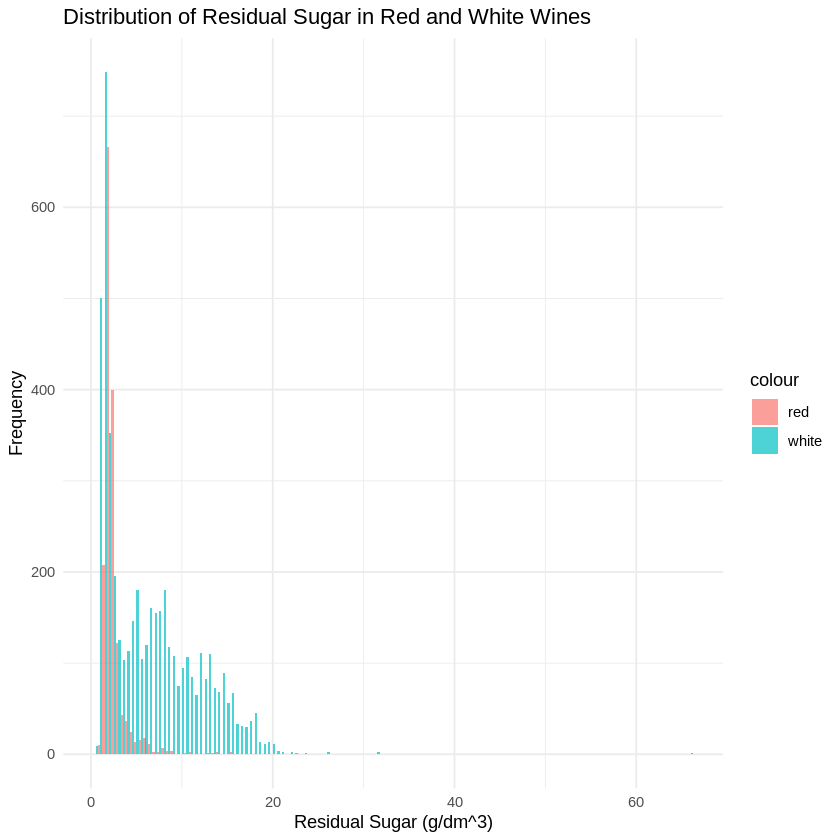

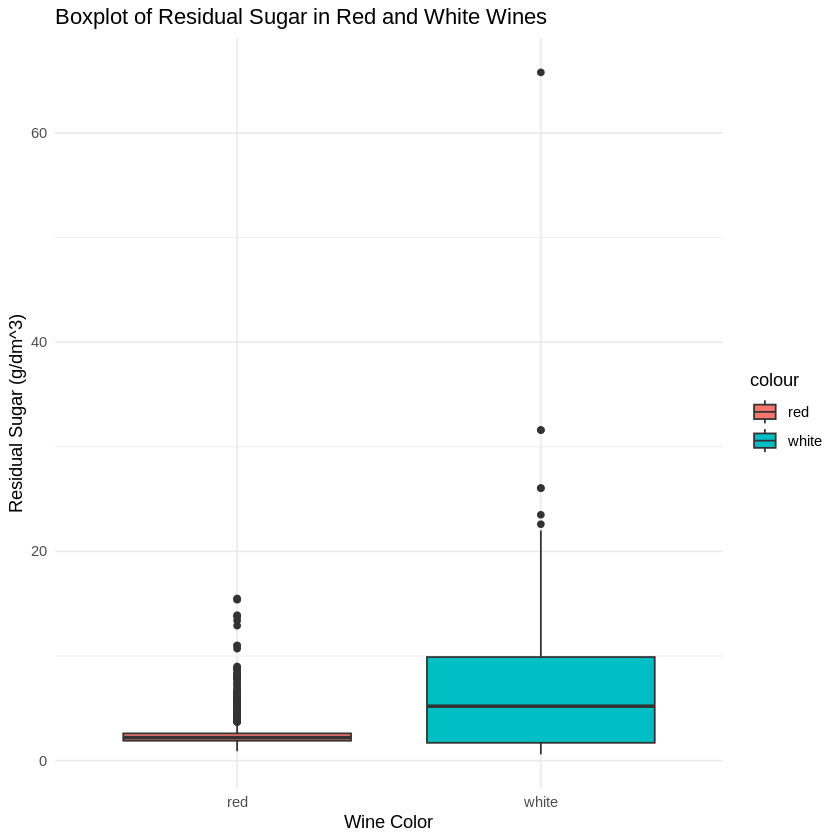

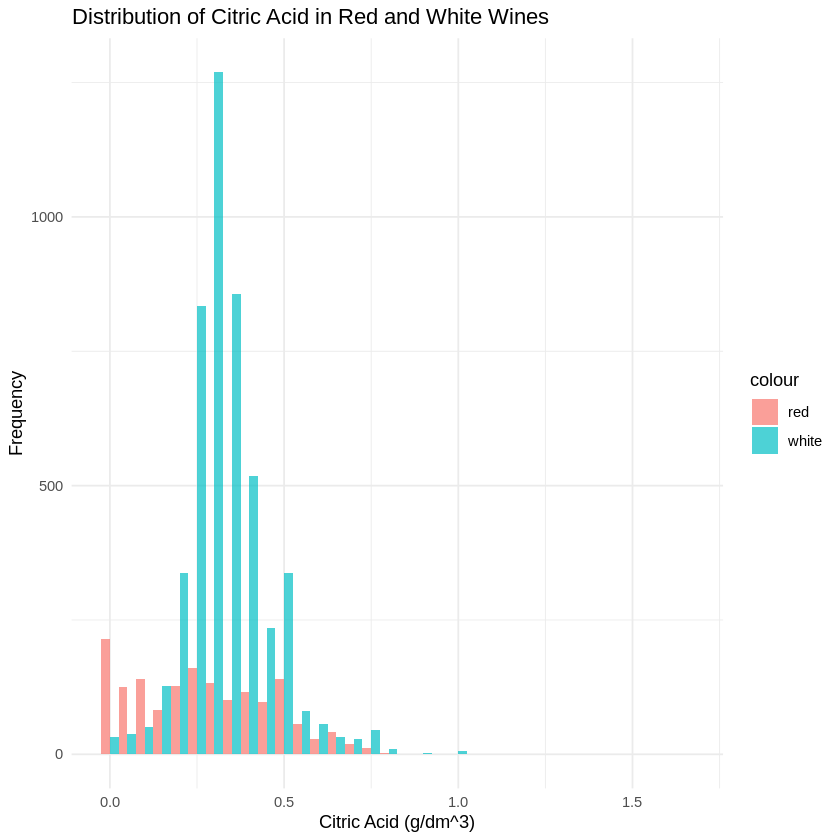

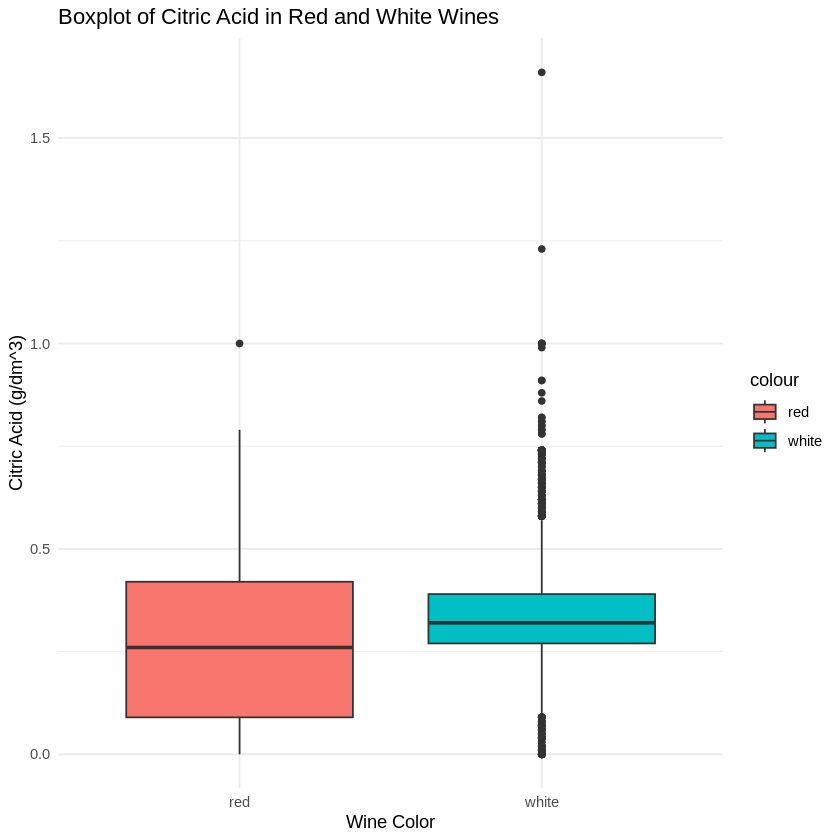

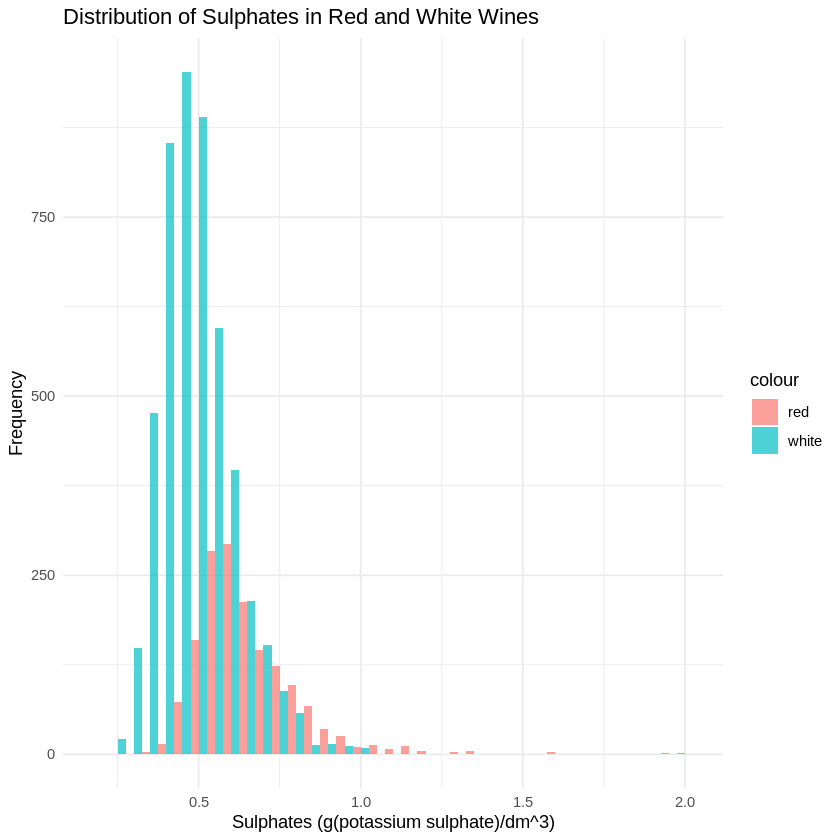

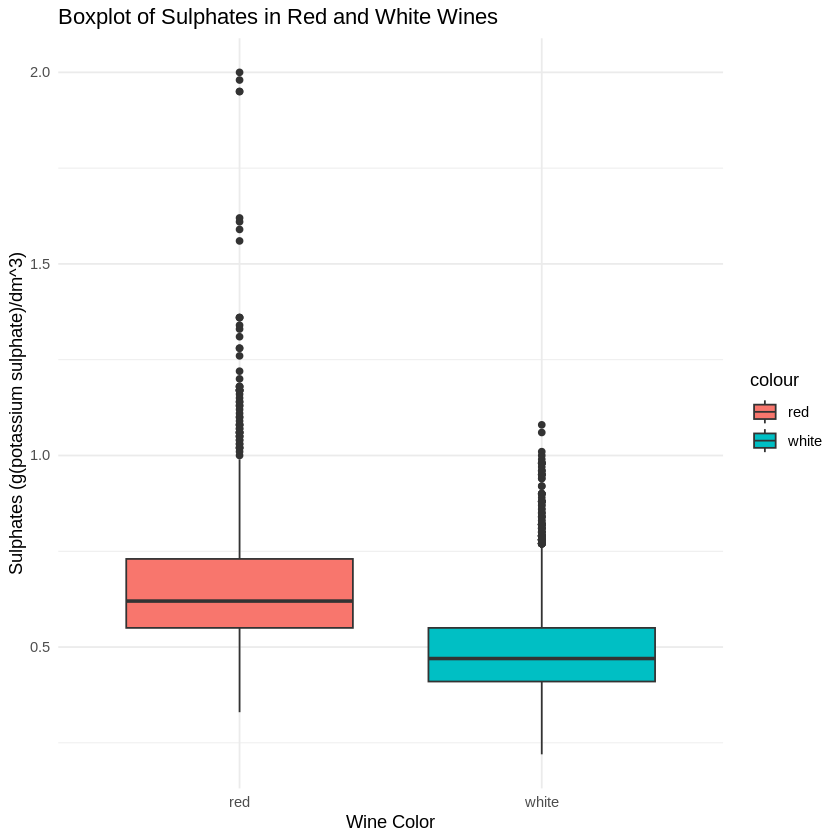

In [29]:
# Histogram for Residual Sugar
ggplot(wine_data, aes(x = residual.sugar, fill = colour)) +
  geom_histogram(binwidth = 0.5, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Residual Sugar in Red and White Wines",
       x = "Residual Sugar (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Residual Sugar
ggplot(wine_data, aes(x = colour, y = residual.sugar, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Residual Sugar in Red and White Wines",
       x = "Wine Color", y = "Residual Sugar (g/dm^3)") +
  theme_minimal()

# Histogram for Citric Acid
ggplot(wine_data, aes(x = citric.acid, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Citric Acid in Red and White Wines",
       x = "Citric Acid (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Citric Acid
ggplot(wine_data, aes(x = colour, y = citric.acid, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Citric Acid in Red and White Wines",
       x = "Wine Color", y = "Citric Acid (g/dm^3)") +
  theme_minimal()

# Histogram for Sulphates
ggplot(wine_data, aes(x = sulphates, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Sulphates in Red and White Wines",
       x = "Sulphates (g(potassium sulphate)/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Sulphates
ggplot(wine_data, aes(x = colour, y = sulphates, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Sulphates in Red and White Wines",
       x = "Wine Color", y = "Sulphates (g(potassium sulphate)/dm^3)") +
  theme_minimal()


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

